In [1]:
from PIL import Image

In [2]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch




/home/thibault/.pyenv/versions/3.8.12/envs/spot-photo/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")


In [4]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.cuda.is_available()
device

device(type='cuda')

In [5]:
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, 

In [6]:


max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
    images = []
    for image_path in image_paths:
        i_image = Image.open(image_path)
        if i_image.mode != "RGB":
            i_image = i_image.convert(mode="RGB")

        images.append(i_image)

    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    output_ids = model.generate(pixel_values, **gen_kwargs)

    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [(image, pred.strip()) for image, pred in zip(image_paths,preds)]
    return preds



In [7]:
from os import walk

f = []
for (dirpath, dirnames, filenames) in walk('photo_pour_Bonne_Maman'):
    f.extend(filenames)
    break


In [8]:
path_photo = []
for name in f :
    path_photo.append(f"photo_pour_Bonne_Maman/{name}")


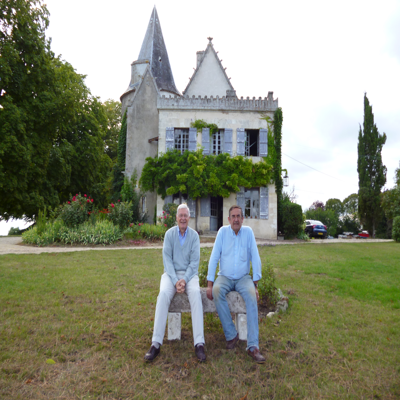

two men standing in front of a house


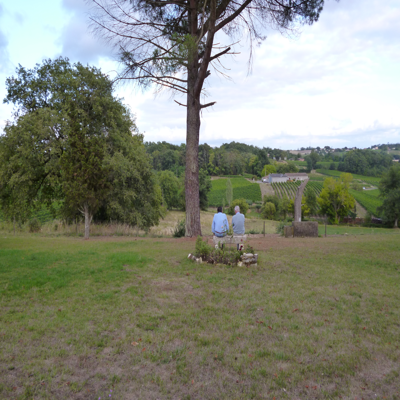

two people standing in a grassy field with trees


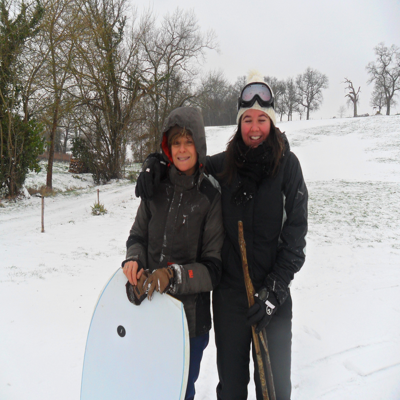

a woman and a man pose for a picture in the snow


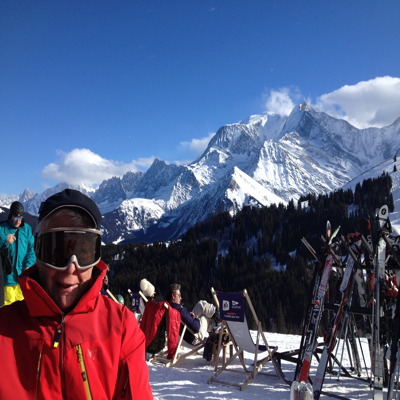

a man standing on top of a snow covered slope


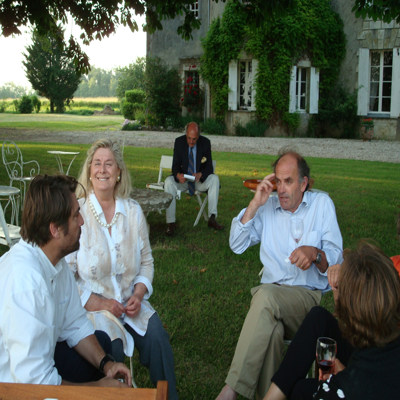

a woman sitting on a bench next to a man


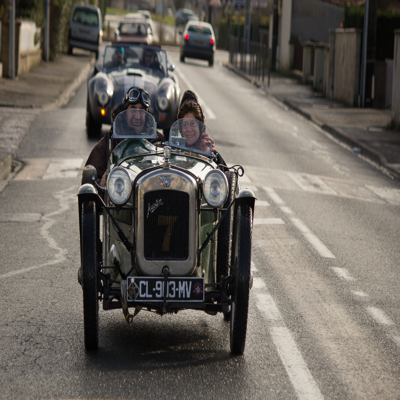

a vintage photo of a vintage car on a road


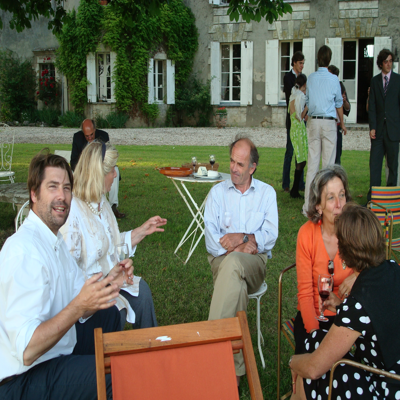

people sitting around a picnic table


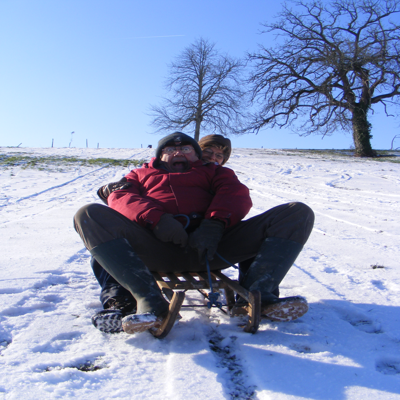

two people sitting on a snowboard in the snow


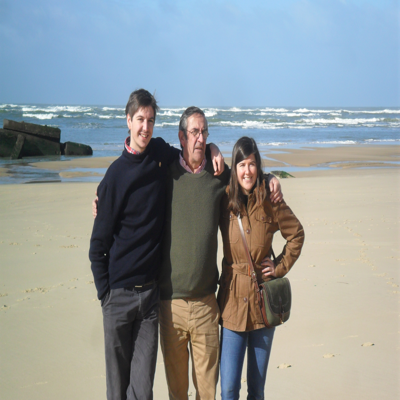

three people posing for a picture on a beach


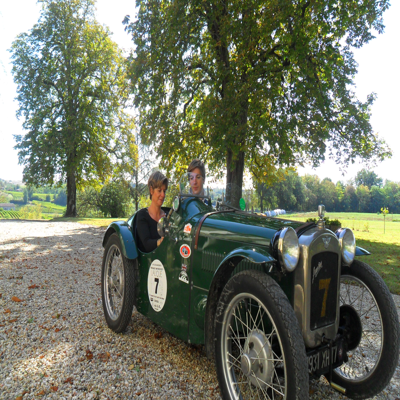

a young girl sitting on top of a motorcycle in a park


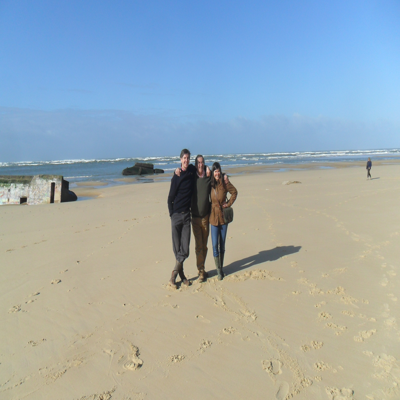

two people standing on a beach with a surfboard


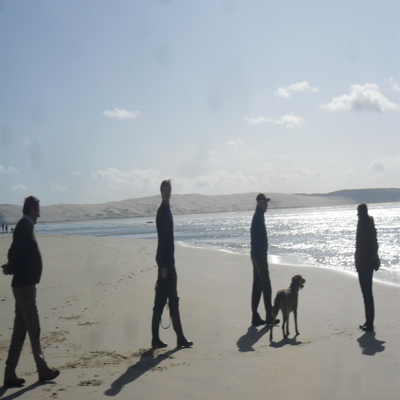

people on a beach with a dog


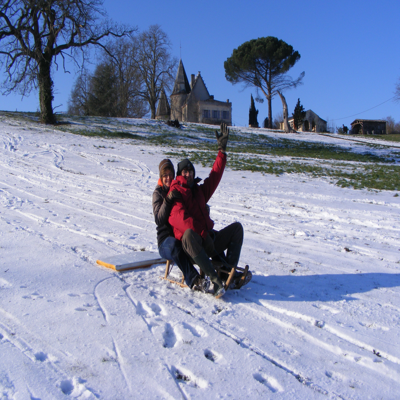

a man sitting on top of a snow covered slope


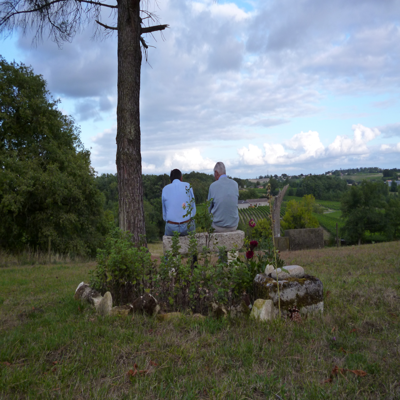

a man standing next to a tree in a field


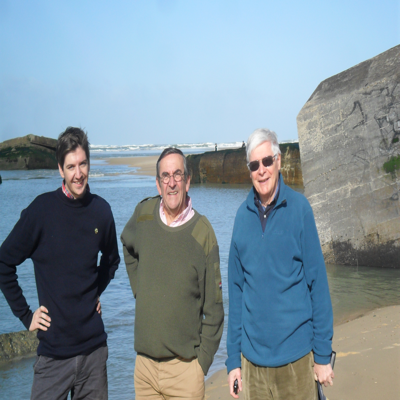

two men standing next to each other on a beach


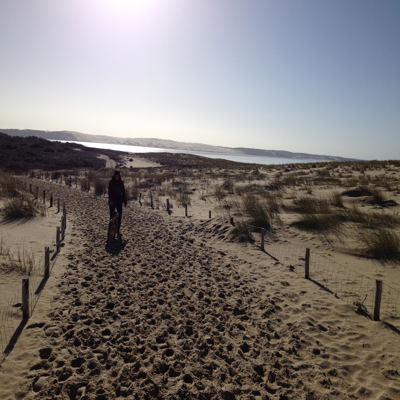

a person walking on a beach with an umbrella


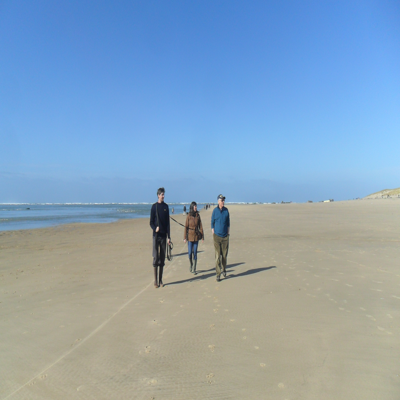

people standing on top of a sandy beach


In [9]:
import IPython.display


for img, pred in predict_step(path_photo) :
    im = Image.open(img)
    im = im.resize((400,400))
    display(im)
    print(pred)
